# Scrap My Prop

### Laboratórios de Engenharia Informática

**"Development of an IT solution for the extraction and automatic analysis of data and relevant information for the calculation of land and properties."**

## Importar Bibliotecas Python

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.debugger import set_trace
import geopy.distance
import os.path
from sklearn import metrics

# 'Imovirtual'

## Ler Dados do CSV

**Junção dos datasets através do 'id'**

In [2]:
k = True

for mes in range(4,6):
    if mes > 0 and mes < 10:
        mes = str(mes).zfill(2)
    print("------ Mês:", mes)
    for dia in range(1,31):
        if dia > 0 and dia < 10:
            dia = str(dia).zfill(2)
        print("--- Dia:", dia)
        if os.path.isfile(f'../dados/dados_imovirtual_{dia}_{mes}.csv'):
            if k:
                data_imo = pd.read_csv(f'../dados/dados_imovirtual_{dia}_{mes}.csv', engine='python', encoding='utf8')
                print(data_imo.shape)
                k = False
            else:
                csv = pd.read_csv(f'../dados/dados_imovirtual_{dia}_{mes}.csv', engine='python', encoding='utf8')
                data_imo = data_imo.append(csv,sort=False)
                data_imo = data_imo.drop_duplicates(subset='Id', keep="last")
                data_imo.index = np.arange(1, len(data_imo) + 1)
                print(data_imo.shape)

------ Mês: 04
--- Dia: 01
--- Dia: 02
--- Dia: 03
--- Dia: 04
--- Dia: 05
--- Dia: 06
--- Dia: 07
--- Dia: 08
--- Dia: 09
--- Dia: 10
--- Dia: 11
--- Dia: 12
--- Dia: 13
--- Dia: 14
--- Dia: 15
(5618, 132)
--- Dia: 16
(5684, 132)
--- Dia: 17
(5712, 132)
--- Dia: 18
(5740, 132)
--- Dia: 19
(5742, 132)
--- Dia: 20
(5755, 132)
--- Dia: 21
(5758, 132)
--- Dia: 22
(5796, 132)
--- Dia: 23
(5803, 132)
--- Dia: 24
(5827, 132)
--- Dia: 25
(5874, 132)
--- Dia: 26
(5877, 132)
--- Dia: 27
(5880, 132)
--- Dia: 28
--- Dia: 29
--- Dia: 30
------ Mês: 05
--- Dia: 01
--- Dia: 02
--- Dia: 03
--- Dia: 04
--- Dia: 05
--- Dia: 06
--- Dia: 07
--- Dia: 08
--- Dia: 09
(6160, 132)
--- Dia: 10
(6160, 132)
--- Dia: 11
(6162, 132)
--- Dia: 12
(6195, 132)
--- Dia: 13
(6222, 132)
--- Dia: 14
(6252, 132)
--- Dia: 15
(6289, 132)
--- Dia: 16
(6372, 132)
--- Dia: 17
(6373, 132)
--- Dia: 18
(6383, 132)
--- Dia: 19
(6437, 132)
--- Dia: 20
(6453, 132)
--- Dia: 21
--- Dia: 22
(6513, 132)
--- Dia: 23
(6532, 132)
--- Dia: 2

In [3]:
#data_imo = pd.read_csv('../dados/dados_imovirtual_08_05.csv', engine='python', encoding='utf8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
data_imo.head()

,Nome,Id,Tipo de imóvel,Preço,Preço m/2,Distrito,Concelho,Freguesia,Rua,Latitude,Longitude,Tipologia,Nº Casas de Banho,Área útil m/2,Área bruta m/2,Ano construção,Certificado energético,Armário,Cozinha equipada,Garagem box,Gás canalizado,Lareira,Marquise,Suite,Varanda,Vista de cidade,Condição,Despensa,Arrecadação,Porta blindada,Video Porteiro,Empreendimento,Ar condicionado,Elevador,Estores elétricos,Fibra ótica,Pré-instalação de ar condicionado,Terraço,Área de terreno m/2,Churrasco,Árvores de fruto,Sotão,Cave,Jardim,Aquecimento central,Caldeira,Acessibilidade a pessoas com mobilidade condicionada,Box 2 carros,Detetor de gás,Painéis solares,Recuperação de calor,Vista de campo/serra,Box 1 carro,Portaria,Estacionamento,Piso radiante,Som ambiente,Aspiração central,Finalidade,Tipo de terreno,Acesso pavimentado,Asfaltado,Iluminação pública,Zona arborizada,Declive,Ruína,Alarme,Furo de água,Domótica,Casa das máquinas,Condomínio Fechado,Parque infantil,Piscina,Piscina Privada,Termoacumulador,Garagem exterior,Mobilado,Hidromassagem/jacuzzi,Quintal/horta,Ginásio,Kitchenette,Vigilância/segurança,Campo de ténis,Segurança 24 horas,Vedação,Parqueamento (1 carro),Ligação a rede de água,Ligação a rede de saneamento,Ligação a rede elétrica,Animais permitidos,Parqueamento (2 carros),Cofre,Vista de rio,Nº divisões,Tipo,Pisos,Com WC,Montra,Anexo habitacional,Detetor de incêndio,Detetor de Inundução,Vista de cidade.1,Área (m/2),Vista de mar,Jacuzzi,Património classificado,Adaptada a mobilidade reduzida,Com cozinha,Imóvel de banca,Vista de lago,Fossa séptica,Licensa de construção,Acesso a veículos pesados,Área administrativa,Copa,Recepção,Refeitório,Sala de reuniões,Área florestal,Hidromassagem,Percurso de água,Armazém,Vista de Serra,Adaptado a mobilidade reduzida,Terra batida,Video vigilância,Espaço frigorífico,Espaço para arrumação,Casa de banho partilhada,Poço,Sótão,Paisagem protegida
1,Loja comercial Junto ao Centro da Cidade de Br...,14804552.0,Loja,19 900,622,Braga (distrito),Braga,Sequeira,Rua Inácio José Peixoto,41.554660,-8.432971,NaN,NaN,32 m²,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Usado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Loja,1.0,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Excelente Terreno em Fradelos, Braga",14976693.0,Terreno,97 000,60,Braga (distrito),Braga,Vilaça e Fradelos,NaN,41.507746,-8.477455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rústico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Moradia Terrea em Lomar,15377577.0,Moradia,NaN,NaN,Braga (distrito),Braga,Lomar e Arcos,Rua Quinta das Mouras - Lomar,41.527420,-8.423300,T4,4 ou mais,537 m²,2 448 m²,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Moradia p/ Restauro - Maximinos,14698254.0,Moradia,149 500,1 495,Braga (distrito),Braga,"Braga (Maximinos, Sé e Cividade)",NaN,41.549550,-8.437720,T0,NaN,100 m²,131 m²,1980.0,NaN,NaN,NaN,NaN,Na

## Pré-processamento comum a todo o Dataset

**Funções auxiliares**

In [4]:
def toNumeric(string):
    res = str(string)
    res = res.replace(" ", "")
    res = res.replace(",", ".")
    res = float(pd.to_numeric(res, errors='ignore')) # tem que ser float porque esse tipo consegue interpretar o np.nan
    return res

**Colunas 'Distrito' e 'Concelho': Retirar colunas de forma total porque já era uma pré-condição do projeto, mas primeiro verificar se, de facto, todos os campos estão preenchidos com 'Braga';**

In [5]:
print("Distritos existentes:", data_imo['Distrito'].unique())
print("Concelhos existentes:", data_imo['Concelho'].unique())

Distritos existentes: ['Braga (distrito)' nan]
Concelhos existentes: ['Braga' nan]


In [6]:
if 'Distrito' in data_imo.columns:
    data_imo = data_imo.drop(['Distrito'], axis = 1) 
if 'Concelho' in data_imo.columns:
    data_imo = data_imo.drop(['Concelho'], axis = 1) 

**Coluna 'Nome': Não é característica dos imóveis mas sim identificador, portanto não deve entrar nos cálculos (Drop);**

In [7]:
if 'Nome' in data_imo.columns:
    data_imo = data_imo.drop(['Nome'], axis = 1) 

**Coluna 'Id': Drop linhas sem 'Id'; float -> int;**

In [8]:
data_imo = data_imo.dropna(subset=['Id'])
data_imo.index = np.arange(1, len(data_imo) + 1)

In [9]:
data_imo['Id'] = data_imo['Id'].astype(int)

**Dar join a colunas que, apesar de aparentarem ter nomes diferentes, representam o mesmo**

**Exemplo: Valores de 'Box 1 carro' e 'Box 2 carros' -> 'Garagem box'; Valores de 'Parqueamento (1 carro)' e 'Parqueamento (2 carros)' -> 'Estacionamento'; Valores de 'Hidromassagem' e 'Jacuzzi' -> 'Hidromassagem/jacuzzi'; ...**

**Fazer o mesmo com piscina e piscina privada???**

In [10]:
#pd.set_option('display.max_columns', None)
#data_imo.columns.to_numpy()

In [11]:
for index,val in data_imo['Vista de cidade.1'].items():
    if (val==True):
        data_imo['Vista de cidade'].iloc[index] = True
for index,val in data_imo['Sótão'].items():
    if (val==True):
        data_imo['Sotão'].iloc[index] = True
for index,val in data_imo['Vista de Serra'].items():
    if (val==True):
        data_imo['Vista de campo/serra'].iloc[index] = True
for index,val in data_imo['Adaptada a mobilidade reduzida'].items():
    if (val==True):
        data_imo['Adaptado a mobilidade reduzida'].iloc[index] = True
for index,val in data_imo['Box 1 carro'].items():
    if (val==True):
        data_imo['Garagem box'].iloc[index] = True
for index,val in data_imo['Box 2 carros'].items():
    if (val==True):
        data_imo['Garagem box'].iloc[index] = True
for index,val in data_imo['Parqueamento (1 carro)'].items():
    if (val==True):
        data_imo['Estacionamento'].iloc[index] = True
for index,val in data_imo['Parqueamento (2 carros)'].items():
    if (val==True):
        data_imo['Estacionamento'].iloc[index] = True
for index,val in data_imo['Hidromassagem'].items():
    if (val==True):
        data_imo['Hidromassagem/jacuzzi'].iloc[index] = True
for index,val in data_imo['Jacuzzi'].items():
    if (val==True):
        data_imo['Hidromassagem/jacuzzi'].iloc[index] = True
        
data_imo=data_imo.drop(['Vista de cidade.1', 'Sótão', 'Vista de Serra', 'Hidromassagem', 'Jacuzzi', 'Adaptada a mobilidade reduzida'], axis=1)


C:\Users\Rui\Anaconda3\envs\LEI\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
#data_imo.info(verbose=True, null_counts=True)

**Normalizar os valores de todas as áreas; Transformar em dado numérico;**

In [13]:
for column in data_imo.columns:
    if "Área" in column and "Área administrativa" not in column and "Área florestal" not in column:
        for i in range(len(data_imo[column])):
            if not pd.isnull(data_imo[column].iloc[i]):
                #print(data_imo[column].iloc[i])
                data_imo[column].iloc[i]=toNumeric(str(data_imo[column].iloc[i])[0:-3])
                #print(data_imo[column].iloc[i])
                #print(type(data_imo[column].iloc[i]))

**Coluna 'Preço' e 'Preço m/2': Drop dos imóveis com valor 'nan'; Transformar em dado numérico;**

In [14]:
data_imo['Preço'] = data_imo['Preço'].apply(toNumeric)

nan_prices = data_imo['Preço'].index[data_imo['Preço'].apply(np.isnan)]
data_imo = data_imo.drop(nan_prices)
data_imo.index = np.arange(1, len(data_imo) + 1)

data_imo['Preço'] = data_imo['Preço'].apply(int)

# ------

data_imo['Preço m/2'] = data_imo['Preço m/2'].apply(toNumeric)

nan_prices = data_imo['Preço m/2'].index[data_imo['Preço m/2'].apply(np.isnan)]
data_imo = data_imo.drop(nan_prices)
data_imo.index = np.arange(1, len(data_imo) + 1)

data_imo['Preço m/2'] = data_imo['Preço m/2'].apply(int)

In [15]:
data_imo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6567 entries, 1 to 6567
Data columns (total 123 columns):
 #   Column                                                Dtype  
---  ------                                                -----  
 0   Id                                                    int32  
 1   Tipo de imóvel                                        object 
 2   Preço                                                 int64  
 3   Preço m/2                                             int64  
 4   Freguesia                                             object 
 5   Rua                                                   object 
 6   Latitude                                              float64
 7   Longitude                                             float64
 8   Tipologia                                             object 
 9   Nº Casas de Banho                                     object 
 10  Área útil m/2                                         object 
 11  Área bruta m/2  

# Dados - Trespasses

**Ver os valores únicos de cada coluna para proceder ao processamento**

In [16]:
for col in data_imo.columns:
    uniques=data_imo[col].unique()
    print("Valores únicos para a coluna ", col, ": ", uniques)

Valores únicos para a coluna  Id :  [14804552 14976693 14698254 ... 12380131  6701616  6701610]
Valores únicos para a coluna  Tipo de imóvel :  ['Loja' 'Terreno' 'Moradia' 'Apartamento' 'Escritório' 'Prédio' 'Quintas'
 'Armazém' 'Garagem' 'Trespasses']
Valores únicos para a coluna  Preço :  [   19900    97000   149500   288000   116000   315000   148000   180000
   298000    40000    50000   350000    99700    12500   140000   177000
    90000   270000   117500   250000   290000   320000  2000000    68000
   199000   500000   230000   125000   281000   210000   330000   225000
   295000   215000   425000   115000   220000   397500   300000   150000
    70000   285000   245000    63000    77500   188000    95000   112500
    57000   580000    60000    94000     7000   335000   123000    85000
    99000     9500     8000   340000   128250   165000   325000    82000
   275000    55000   360000   185000  9900000   680000   649000   249900
   310000   157000   365000    77000   155000   259

**Dividir os dados por tipo de imóvel**

In [17]:
data_imo_trespasses = data_imo.loc[(data_imo['Tipo de imóvel'] == 'Trespasses')]
data_imo_trespasses.index = np.arange(1, len(data_imo_trespasses) + 1)

In [18]:
data_imo_trespasses.head()

,Id,Tipo de imóvel,Preço,Preço m/2,Freguesia,Rua,Latitude,Longitude,Tipologia,Nº Casas de Banho,Área útil m/2,Área bruta m/2,Ano construção,Certificado energético,Armário,Cozinha equipada,Garagem box,Gás canalizado,Lareira,Marquise,Suite,Varanda,Vista de cidade,Condição,Despensa,Arrecadação,Porta blindada,Video Porteiro,Empreendimento,Ar condicionado,Elevador,Estores elétricos,Fibra ótica,Pré-instalação de ar condicionado,Terraço,Área de terreno m/2,Churrasco,Árvores de fruto,Sotão,Cave,Jardim,Aquecimento central,Caldeira,Acessibilidade a pessoas com mobilidade condicionada,Box 2 carros,Detetor de gás,Painéis solares,Recuperação de calor,Vista de campo/serra,Box 1 carro,Portaria,Estacionamento,Piso radiante,Som ambiente,Aspiração central,Finalidade,Tipo de terreno,Acesso pavimentado,Asfaltado,Iluminação pública,Zona arborizada,Declive,Ruína,Alarme,Furo de água,Domótica,Casa das máquinas,Condomínio Fechado,Parque infantil,Piscina,Piscina Privada,Termoacumulador,Garagem exterior,Mobilado,Hidromassagem/jacuzzi,Quintal/horta,Ginásio,Kitchenette,Vigilância/segurança,Campo de ténis,Segurança 24 horas,Vedação,Parqueamento (1 carro),Ligação a rede de água,Ligação a rede de saneamento,Ligação a rede elétrica,Animais permitidos,Parqueamento (2 carros),Cofre,Vista de rio,Nº divisões,Tipo,Pisos,Com WC,Montra,Anexo habitacional,Detetor de incêndio,Detetor de Inundução,Área (m/2),Vista de mar,Património classificado,Com cozinha,Imóvel de banca,Vista de lago,Fossa séptica,Licensa de construção,Acesso a veículos pesados,Área administrativa,Copa,Recepção,Refeitório,Sala de reuniões,Área florestal,Percurso de água,Armazém,Adaptado a mobilidade reduzida,Terra batida,Video vigilância,Espaço frigorífico,Espaço para arrumação,Casa de banho partilhada,Poço,Paisagem protegida
1,12358735,Trespasses,123000,1025,Braga (São José de São Lázaro e São João do So...,NaN,41.550650,-8.425066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15340571,Trespasses,99000,298,Braga (São José de São Lázaro e São João do So...,Praça da República - São João do Souto,41.551746,-8.423182,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Usado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Loja,NaN,NaN,NaN,NaN,NaN,NaN,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15089074,Trespasses,15990,160,"Braga (Maximinos, Sé e Cividade)",NaN,41.547620,-8.426740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Usado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15255657,Trespasses,73000,589,"Braga (Maximinos, Sé e Cividade)",NaN,41.545550,-8.427330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [19]:
#data_imo_trespasses.info(verbose=True, null_counts=True)

## Análise exploratória de dados

*Distribuição da feature 'Preço'*

Text(0.5, 0, 'Preço')

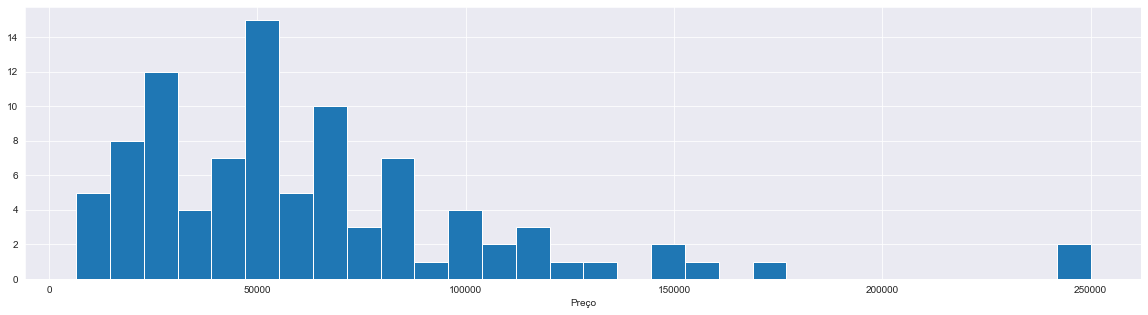

In [20]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
data_imo_trespasses['Preço'].hist(bins=30)
plt.xlabel('Preço')

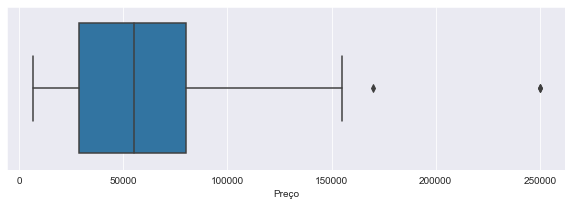

In [21]:
fig = plt.figure(figsize = (10,3))
sns.boxplot(x=data_imo_trespasses['Preço'])

*Distribuição da feature 'Preço' - Outliers visuais*

In [22]:
a_excluir = data_imo_trespasses[(data_imo_trespasses['Preço'] >= 200000)]
#a_excluir = data_imo_trespasses[(data_imo_trespasses['Preço'] >= 400000) | (data_imo_trespasses['Preço'] <= 150000)]
data_imo_trespasses = data_imo_trespasses.drop(a_excluir.index)
data_imo_trespasses.index = np.arange(1, len(data_imo_trespasses) + 1)
a_excluir

,Id,Tipo de imóvel,Preço,Preço m/2,Freguesia,Rua,Latitude,Longitude,Tipologia,Nº Casas de Banho,Área útil m/2,Área bruta m/2,Ano construção,Certificado energético,Armário,Cozinha equipada,Garagem box,Gás canalizado,Lareira,Marquise,Suite,Varanda,Vista de cidade,Condição,Despensa,Arrecadação,Porta blindada,Video Porteiro,Empreendimento,Ar condicionado,Elevador,Estores elétricos,Fibra ótica,Pré-instalação de ar condicionado,Terraço,Área de terreno m/2,Churrasco,Árvores de fruto,Sotão,Cave,Jardim,Aquecimento central,Caldeira,Acessibilidade a pessoas com mobilidade condicionada,Box 2 carros,Detetor de gás,Painéis solares,Recuperação de calor,Vista de campo/serra,Box 1 carro,Portaria,Estacionamento,Piso radiante,Som ambiente,Aspiração central,Finalidade,Tipo de terreno,Acesso pavimentado,Asfaltado,Iluminação pública,Zona arborizada,Declive,Ruína,Alarme,Furo de água,Domótica,Casa das máquinas,Condomínio Fechado,Parque infantil,Piscina,Piscina Privada,Termoacumulador,Garagem exterior,Mobilado,Hidromassagem/jacuzzi,Quintal/horta,Ginásio,Kitchenette,Vigilância/segurança,Campo de ténis,Segurança 24 horas,Vedação,Parqueamento (1 carro),Ligação a rede de água,Ligação a rede de saneamento,Ligação a rede elétrica,Animais permitidos,Parqueamento (2 carros),Cofre,Vista de rio,Nº divisões,Tipo,Pisos,Com WC,Montra,Anexo habitacional,Detetor de incêndio,Detetor de Inundução,Área (m/2),Vista de mar,Património classificado,Com cozinha,Imóvel de banca,Vista de lago,Fossa séptica,Licensa de construção,Acesso a veículos pesados,Área administrativa,Copa,Recepção,Refeitório,Sala de reuniões,Área florestal,Percurso de água,Armazém,Adaptado a mobilidade reduzida,Terra batida,Video vigilância,Espaço frigorífico,Espaço para arrumação,Casa de banho partilhada,Poço,Paisagem protegida
14,14464297,Trespasses,250000,2000,"Braga (Maximinos, Sé e Cividade)",NaN,41.542927,-8.437615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Usado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,15304551,Trespasses,250000,1667,"Braga (Maximinos, Sé e Cividade)",NaN,41.549565,-8.430490,NaN,NaN,NaN,NaN,2015.0,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Usado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurante,NaN,True,NaN,NaN,NaN,NaN,150,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Relação entre o Preço e outras variáveis*

Text(0, 0.5, 'Preço')

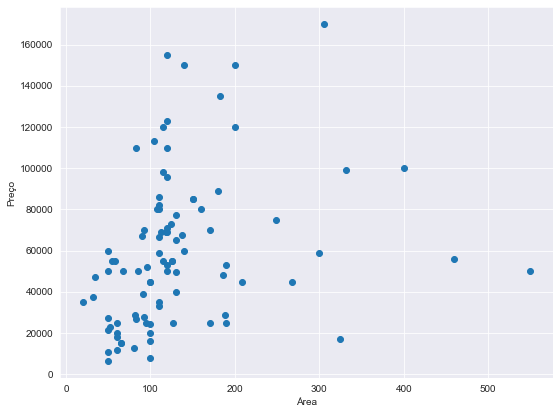

In [23]:
fig = plt.figure(figsize = (30,15))

ax1 = fig.add_subplot(2,3,1)
ax1.scatter(data_imo_trespasses['Área (m/2)'], data_imo_trespasses['Preço'])
ax1.set_xlabel('Área')
ax1.set_ylabel('Preço')

*Relacionamento do 'Preço' com outras features categóricas importantes*

In [24]:
cat_data = data_imo_trespasses[['Freguesia']]

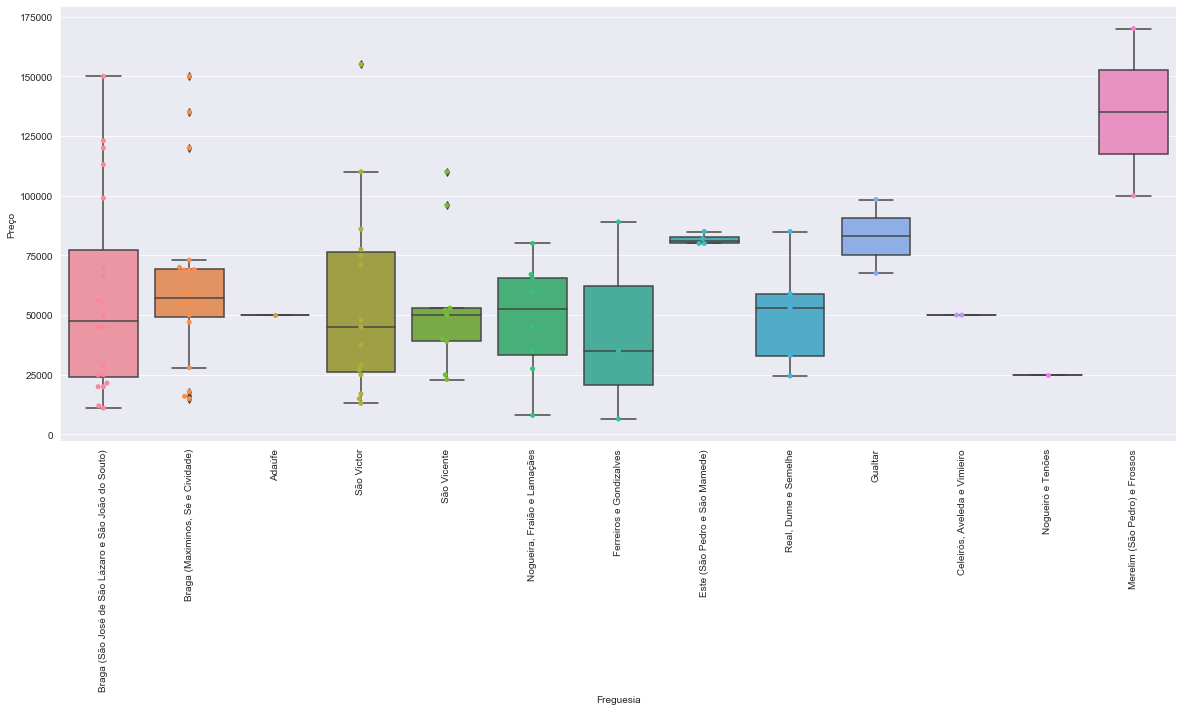

In [25]:
for cat in cat_data.dtypes[:10].index.values:
    plt.figure(figsize=(20, 8))
    plt.xticks(rotation=90)
    sns.boxplot(x=cat, y='Preço', data=data_imo_trespasses) 
    sns.swarmplot(x=cat, y='Preço', data=data_imo_trespasses)
    plt.show()

**Dados em falta por coluna**

In [26]:
pd.set_option('display.max_rows', None)
percent_missing = data_imo_trespasses.isnull().sum() * 100 / len(data_imo_trespasses)
missing_value_data_imo_trespasses_columns = pd.DataFrame({'percent_missing (%)': percent_missing})
sort_data = missing_value_data_imo_trespasses_columns.copy()
sort_data.sort_values('percent_missing (%)', inplace=True, ascending=False)
sort_data

,percent_missing (%)
Declive,100.000000
Quintal/horta,100.000000
Parqueamento (2 carros),100.000000
Animais permitidos,100.000000
Ligação a rede elétrica,100.000000
Ligação a rede de saneamento,100.000000
Ligação a rede de água,100.000000
Parqueamento (1 carro),100.000000
Vedação,100.000000
Segurança 24 horas,100.000000


In [27]:
pd.set_option('display.max_rows', 10)

**Remover colunas que tenham mais de 30% (?) de missing values**

In [28]:
a_manter = list(missing_value_data_imo_trespasses_columns.index[missing_value_data_imo_trespasses_columns['percent_missing (%)'] < 30])
data_imo_trespasses = data_imo_trespasses[a_manter]
data_imo_trespasses

,Id,Tipo de imóvel,Preço,Preço m/2,Freguesia,Latitude,Longitude,Condição,Área (m/2)
1,12358735,Trespasses,123000,1025,Braga (São José de São Lázaro e São João do So...,41.550650,-8.425066,Novo,120
2,15340571,Trespasses,99000,298,Braga (São José de São Lázaro e São João do So...,41.551746,-8.423182,Usado,332
3,15089074,Trespasses,15990,160,"Braga (Maximinos, Sé e Cividade)",41.547620,-8.426740,Usado,100
4,15255657,Trespasses,73000,589,"Braga (Maximinos, Sé e Cividade)",41.545550,-8.427330,NaN,124
5,15046870,Trespasses,50000,91,Adaúfe,41.589984,-8.398076,Usado,550
...,...,...,...,...,...,...,...,...,...
88,14991608,Trespasses,80000,727,Este (São Pedro e São Mamede),41.570113,-8.356951,Usado,110
89,15222039,Trespasses,50000,746,"Braga (Maximinos, Sé e Cividade)",41.546678,-8.433955,Usado,67
90,14667279,Trespasses,25000,417,Braga (São José de São Lázaro e São João do So...,41.550650,-8.425066,Usado,60
91,13161934,Trespasses,67500,493,Gualtar,41.564190,-8.405680,Usado,137


**Dados em falta por linha**

In [29]:
percent_missing = (1 - data_imo_trespasses.apply(lambda x: x.count(), axis=1) / len(data_imo_trespasses.columns)) * 100
missing_value_data_imo_trespasses_rows = pd.DataFrame({'percent_missing (%)': percent_missing})
sort_data = missing_value_data_imo_trespasses_rows.copy()
sort_data.sort_values('percent_missing (%)', inplace=True, ascending=False)
sort_data

,percent_missing (%)
71,11.111111
76,11.111111
72,11.111111
25,11.111111
27,11.111111
...,...
32,0.000000
31,0.000000
30,0.000000
29,0.000000


**Remover linhas com percentagem de dados em falta superior a 50%**

In [30]:
a_excluir = missing_value_data_imo_trespasses_rows[(missing_value_data_imo_trespasses_rows['percent_missing (%)'] >= 50)]
data_imo_trespasses = data_imo_trespasses.drop(a_excluir.index)
data_imo_trespasses.index = np.arange(1, len(data_imo_trespasses) + 1)

**Inserir dados em falta**

In [31]:
for x in data_imo_trespasses.select_dtypes(include=['float64']).columns.tolist():
    median_value=data_imo_trespasses[x].median()
    data_imo_trespasses[x]=data_imo_trespasses[x].fillna(median_value)

for y in data_imo_trespasses.select_dtypes(include=['object']).columns.tolist():
    mode_value=data_imo_trespasses[y].mode()
    data_imo_trespasses[y]=data_imo_trespasses[y].fillna(mode_value[0])    
    
data_imo_trespasses

,Id,Tipo de imóvel,Preço,Preço m/2,Freguesia,Latitude,Longitude,Condição,Área (m/2)
1,12358735,Trespasses,123000,1025,Braga (São José de São Lázaro e São João do So...,41.550650,-8.425066,Novo,120.0
2,15340571,Trespasses,99000,298,Braga (São José de São Lázaro e São João do So...,41.551746,-8.423182,Usado,332.0
3,15089074,Trespasses,15990,160,"Braga (Maximinos, Sé e Cividade)",41.547620,-8.426740,Usado,100.0
4,15255657,Trespasses,73000,589,"Braga (Maximinos, Sé e Cividade)",41.545550,-8.427330,Usado,124.0
5,15046870,Trespasses,50000,91,Adaúfe,41.589984,-8.398076,Usado,550.0
...,...,...,...,...,...,...,...,...,...
88,14991608,Trespasses,80000,727,Este (São Pedro e São Mamede),41.570113,-8.356951,Usado,110.0
89,15222039,Trespasses,50000,746,"Braga (Maximinos, Sé e Cividade)",41.546678,-8.433955,Usado,67.0
90,14667279,Trespasses,25000,417,Braga (São José de São Lázaro e São João do So...,41.550650,-8.425066,Usado,60.0
91,13161934,Trespasses,67500,493,Gualtar,41.564190,-8.405680,Usado,137.0


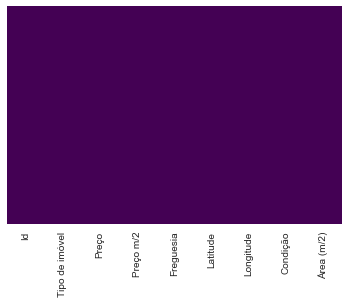

In [32]:
sns.heatmap(data_imo_trespasses.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Estruturação dos Dados

## Inserção de dados acerca da localização do imóvel

*www.google.com/maps/*

**Funções auxiliares**

In [33]:
def distance_coordinates(lat1,lon1,lat2,lon2):
    
    coords_1 = (lat1, lon1)
    coords_2 = (lat2, lon2)
    
    res = geopy.distance.geodesic(coords_1, coords_2).km

    return round(res,3)

def minDist(data_imo, values):
    distancias = []
    for index, row in data_imo.iterrows():
        min_dist = 99999999.9
        for value in values.values():
            dist = distance_coordinates(data_imo_trespasses.iloc[index-1]['Latitude'],data_imo_trespasses.iloc[index-1]['Longitude'],value[0],value[1])
            if dist < min_dist:
                min_dist = dist    
        distancias.append(min_dist)
    return distancias

**Centro da Cidade**

In [34]:
centro_cidade = {}
centro_cidade['Centro'] = 41.5514083,-8.4230248

In [35]:
data_imo_trespasses['Centro Cidade (km)'] = minDist(data_imo_trespasses, centro_cidade)

**Hospitais**

In [36]:
hospitais = {}
hospitais['Hospital de Braga'] = 41.5679738,-8.3990116
hospitais['Trofa Saúde - Braga Sul'] = 41.5246625,-8.4141593
hospitais['Trofa Saúde - Braga Centro'] = 41.5498965,-8.4187538
hospitais['Lusíadas Braga'] = 41.5476764,-8.4224197

In [37]:
data_imo_trespasses['Hospitais (km)'] = minDist(data_imo_trespasses, hospitais)

**Centros de Saúde**

In [38]:
centros_saude = {}
centros_saude['Braga Centro'] = 41.5471857,-8.4279198
centros_saude['Infias'] = 41.5602432,-8.4228005
centros_saude['USF do Minho'] = 41.5465815,-8.4147386
centros_saude['Clinica de Sao Marcos'] = 41.5454486,-8.426507
centros_saude['O Poverello'] = 41.5703584,-8.4114745
centros_saude['Clinica Cubana Braga'] = 41.5492599,-8.4262347
centros_saude['Clinica Médico - Cirurgica De Santa Tecla'] = 41.5489178,-8.4117642
centros_saude['Hemoatlantico - Braga'] = 41.5459355,-8.4314237
centros_saude['Centro de Vacinação Internacional'] = 41.5586578,-8.3999608
centros_saude['Clinica Enguardas'] = 41.5571581,-8.4127898
centros_saude['USF Braga Norte'] = 41.5603489,-8.4227264
centros_saude['USF Carandá'] = 41.5525337,-8.4123
centros_saude['USF Bracara Augusta'] = 41.5422297,-8.4105532
centros_saude['USF Maxisaúde'] = 41.5473324,-8.4279983
centros_saude['USF São Lourenço'] = 41.5142651,-8.4559502
centros_saude['USF São João de Braga'] = 41.5463782,-8.4145564
centros_saude['USF Manuel Rocha Peixoto'] = 41.5473003,-8.4279339
centros_saude['USF Gualtar'] = 41.5682764,-8.3871645
centros_saude['USF Saúde Oeste'] = 41.5325817,-8.4733681
centros_saude['USF Tadim'] = 41.5079792,-8.4879975
centros_saude['Gualtar'] = 41.5683003,-8.3872187
centros_saude['USF Esporões'] = 41.5120606,-8.4201814
centros_saude['USF Salutis'] = 41.5465247,-8.4147014
centros_saude['USP de Braga'] = 41.5588888,-8.3998833

In [39]:
data_imo_trespasses['Centros Saúde (km)'] = minDist(data_imo_trespasses, centros_saude)

**Centros Comerciais**

In [40]:
centroscomerciais = {}
centroscomerciais['Braga Parque'] = 41.5577669,-8.4060603
centroscomerciais['Minho Center'] = 41.540935,-8.400464
centroscomerciais['Nova Arcada'] = 41.579068,-8.429654

In [41]:
data_imo_trespasses['Centro Comerciais (km)'] = minDist(data_imo_trespasses, centroscomerciais)

**Escolas**

In [42]:
escolas = {}
escolas['Secundária Sá de Miranda'] = 41.5568137,-8.4182525
escolas['Básica Francisco Sanches'] = 41.5548131,-8.4118978
escolas['Básica de Gualtar'] = 41.5669867,-8.38796
escolas['Básica de Lamaçães'] = 41.5471216,-8.4016327
escolas['Secundária Carlos Amarante'] = 41.5509961,-8.413909
escolas['Básica de Palmeira'] = 41.5771831,-8.4245399
escolas['Secundária de Maximinos'] = 41.5424538,-8.4415713
escolas['Básica André Soares'] = 41.5470115,-8.415924
escolas['Básica do 1º Ciclo de São Vitor'] = 41.55186,-8.4129202
escolas['Básica de Real'] = 41.5577824,-8.4395854
escolas['Jardim Escola João de Deus'] = 41.5447436,-8.407904
escolas['Colégio Luso Internacional de Braga'] = 41.56979,-8.3885487
escolas['EB1 Quinta da Veiga'] = 41.5590263,-8.4239226
escolas['Secundária D. Maria II'] = 41.5487484,-8.4177364
escolas['Básica Bairro da Misericórdia'] = 41.5578043,-8.4262862
escolas['EB1 Carandá'] = 41.5452545,-8.4156397
escolas['Colégio Dom Diogo de Sousa'] = 41.5575,-8.415931
escolas['Centro Escolar Ponte Pedrinha'] = 41.5403601,-8.4294783
escolas['EB1/J1 Bairro da Alegria'] = 41.5638599,-8.402921

In [43]:
data_imo_trespasses['Escolas (km)'] = minDist(data_imo_trespasses, escolas)

**Universidades**

In [44]:
universidades = {}
universidades['Universidade do Minho - Campus de Gualtar'] = 41.5607319,-8.3962368
universidades['IPCA - Pólo de Braga'] = 41.5421121,-8.4210972
universidades['Universidade Católica Portuguesa'] = 41.554852,-8.4209143

In [45]:
data_imo_trespasses['Universidades (km)'] = minDist(data_imo_trespasses, universidades)

**Estação de Comboios**

In [46]:
estacao = {}
estacao['Estacao'] = 41.548143,-8.4344431

In [47]:
data_imo_trespasses['Estação de Comboios (km)'] = minDist(data_imo_trespasses, estacao)

**Parques Industriais**

*www.igogo.pt/parques-industriais-braga/*

In [48]:
parques_industriais = {}
parques_industriais['Frossos'] = 41.5595545,-8.447319
parques_industriais['Quinta do Carreiro'] = 41.5653531,-8.4454561
parques_industriais['Adaúfe'] = 41.5974779,-8.4135554
parques_industriais['Celeirós'] = 41.5109663,-8.454419
parques_industriais['Marvilha'] = 41.5318363,-8.4735374
parques_industriais['Mire de Tibães'] = 41.5819656,-8.4767172
parques_industriais['Padim da Graça'] = 41.5692605,-8.4890601
parques_industriais['Pitancinhos'] = 41.5840245,-8.4219733
parques_industriais['Vilça'] = 41.5154222,-8.4937553

In [49]:
data_imo_trespasses['Parques Industriais (km)'] = minDist(data_imo_trespasses, parques_industriais)

**Central de Autocarros**

In [50]:
central_autocarros = {}
central_autocarros['Central'] = 41.555324,-8.425410

In [51]:
data_imo_trespasses['Central Autocarros (km)'] = minDist(data_imo_trespasses, central_autocarros)

**Bancos**

In [52]:
bancos = {}
bancos['BPI Frossos'] = 41.561298,-8.447379
bancos['BPI Gualtar'] = 41.5647823,-8.3876109
bancos['Crédito Agrícola Braga'] = 41.5514726,-8.4278259
bancos['Activo Bank'] = 41.5521836,-8.4267081
bancos['Banif Centro'] = 41.5524396,-8.4236611
bancos['Banco de Portugal'] = 41.5518264,-8.4234077
bancos['Montepio Centro'] = 41.5517009,-8.4180607
bancos['Montepio Centro 2'] = 41.5507289,-8.4250391
bancos['Novo Banco Centro'] = 41.5507776,-8.4238804
bancos['Banco de Investimento Global'] = 41.5495727,-8.4251216
bancos['Novo Banco Centro 2'] = 41.5492902,-8.4121129
bancos['Banco Millenium BCP São Lázaro'] = 41.5475307,-8.4210104
bancos['BBVA São Lázaro'] = 41.5464477,-8.4199778
bancos['Santander Totta Lamaçães'] = 41.5479773,-8.4033012
bancos['Caixa Geral de Depósito Lamaçães'] = 41.5480627,-8.4035902
bancos['BPI Dume'] = 41.5450355,-8.4019862
bancos['Novo Banco Maximinos'] = 41.5448869,-8.4337664
bancos['Caixa Geral de Depósitos Maximinos'] = 41.547196,-8.4338421
bancos['BPI N14'] = 41.53774,-8.434457

In [53]:
data_imo_trespasses['Bancos (km)'] = minDist(data_imo_trespasses, bancos)

**Correios**

In [54]:
correios = {}
correios['CTT Maximinos'] = 41.5444322,-8.4340695
correios['CTT São Lázaro'] = 41.544917,-8.420586
correios['CTT Fonte Seca'] = 41.535935,-8.4016483
correios['CTT 25 de Abril'] = 41.5474966,-8.4204056
correios['Estação de Correios de Santa Tecla'] = 41.5484275,-8.4118152
correios['CTT Nogueira, Fraiões e Lamaçães'] = 41.5480095,-8.4040274
correios['Posto de Correios de Braga (São José de Lázaro)'] = 41.5497985,-8.4193059
correios['CTT Largo de São Francisco'] = 41.5518429,-8.423987
correios['CTT Braga Parque'] = 41.556725,-8.4056481
correios['CTT Largo de Infias'] = 41.5579778,-8.4165392

In [55]:
data_imo_trespasses['Correios (km)'] = minDist(data_imo_trespasses, correios)

**Parques e zonas verdes**

In [56]:
parques_lazer = {}
parques_lazer['Parque de Lazer de Gerizes'] = 41.5835983,-8.449529
parques_lazer['Parque da Rodovia'] = 41.552828,-8.4031463
parques_lazer['Jardim da Avenida Central'] = 41.551519,-8.421523
parques_lazer['Parque São João da Ponte'] = 41.5454706,-8.4265083
parques_lazer['Parque da Ponte'] = 41.541304, -8.419441
parques_lazer['Parque de Lazer da Rampa da Falperra'] = 41.5309717,-8.3944834
parques_lazer['Parque de Lazer do Ribeiro dos Prados'] = 41.5052344,-8.4422877 

In [57]:
data_imo_trespasses['Parques e Zonas Verdes (km)'] = minDist(data_imo_trespasses, parques_lazer)

**Serviços Públicos**

*https://eportugal.gov.pt/locais-de-atendimento-de-servicos-publicos/-/pesquisa/search_stores*

In [58]:
servicos_publicos = {}
servicos_publicos['Finanças 1'] = 41.5498747,-8.4194008
servicos_publicos['Finanças 2'] = 41.5440114,-8.4358346
servicos_publicos['Segurança Social'] = 41.5477731,-8.4129363
servicos_publicos['Serviços de RSI'] = 41.5424794,-8.4360436
servicos_publicos['Gabinete de Atendimento ao Cidadão'] = 41.5561192,-8.4121799
servicos_publicos['Conservatória do Registo Civil'] = 41.5518773,-8.4222603
servicos_publicos['IEFP - Centro de Emprego'] = 41.5423426,-8.4339527
servicos_publicos['SEF - Loja do Cidadão de Braga'] = 41.5474961,-8.421969
servicos_publicos['Espaço Cidadão Sobreposta'] = 41.547783,-8.3619992
servicos_publicos['Espaço Cidadão Adaúfe'] = 41.5861605,-8.3926854
servicos_publicos['Espaço Cidadão Figueiredo'] = 41.5048946,-8.4349509
servicos_publicos['Espaço Cidadão Real'] = 41.5575145,-8.4440584
servicos_publicos['Espaço Cidadão S. Vicente'] = 41.5565553,-8.4241112
servicos_publicos['Espaço Cidadão Sequeira'] = 41.5323623,-8.4732977
servicos_publicos['Espaço Cidadão Tadim'] = 41.5057871,-8.4916939

In [59]:
data_imo_trespasses['Serviços Públicos (km)'] = minDist(data_imo_trespasses, servicos_publicos)

**Policia Municipal**

In [60]:
policia = {}
policia['Policia'] = 41.5495054,-8.4267993

In [61]:
data_imo_trespasses['Policia Municipal (km)'] = minDist(data_imo_trespasses, policia)

**Farmácias**

*https://portalnacional.com.pt/braga/braga/farmacias/*

In [62]:
farmacias = {}
farmacias['Adaúfe'] = 41.5858796,-8.4020402
farmacias['Alvim - Merelim (São Pedro) e Frossos'] = 41.5595977,8.4479227
farmacias['Araújo Rodrigues - Celeirós'] = 41.5129219,-8.4503908
farmacias['Beatriz - São Vitor'] = 41.5492671,-8.4133199
farmacias['Braga - São Vitor'] = 41.5511534,-8.4064856
farmacias['Brito - São José de São Lázaro e São João do Souto'] = 41.5505688,-8.4228146
farmacias['Carmo - Merelim (São Pedro) e Frossos'] = 41.5716977,-8.45249
farmacias['Central - São José de São Lázaro e São João do Souto'] = 41.551847,-8.4250035
farmacias['Coelho - Maximinos, Sé e Cividade'] = 41.5514527,-8.4280069
farmacias['Cristal - São José de São Lázaro'] = 41.5486228,-8.4216631
farmacias['Santa Casa da Misericórdia - São José de São Lázaro e São João do Souto'] = 41.5490779,-8.4232058
farmacias['Esporões'] = 41.5119635,-8.4203129
farmacias['Gualtar'] = 41.565306,-8.3872187
farmacias['Lamaçães'] = 41.547976,-8.4012761
farmacias['Lomar'] = 41.5307238,-8.427394
farmacias['Henriquina - São Vitor'] = 41.5524657,-8.4139864
farmacias['Lima - São José de São Lázaro e São João do Souto'] = 41.5536114,-8.4235402
farmacias['Loureiro Basto - Palmeira'] = 41.5905331,-8.4295469
farmacias['Marques - São José de São Lázaro e São João do Souto'] = 41.550423,-8.423677
farmacias['Martins - São José de São Lázaro e São João do Souto'] = 41.5510726,-8.4223516
farmacias['Narcisa C. Dias - Veiga do Penso, Escudeiros e Penso'] = 41.4868491,-8.4292978
farmacias['Nova de Nogueira - Nogueira'] = 41.5304337,-8.4102638
farmacias['Nuno Barros - Real'] = 41.554171,-8.438716
farmacias['Oliveira - Ferreiros'] = 41.5345909,-8.4400511
farmacias['Osório - Ruães'] = 41.5808657,-8.4758667
farmacias['Pimenta - Cabreiros'] = 41.5334211,-8.4965154
farmacias['Farmácia Pimentel - Sao Vitor'] = 41.557452,-8.408761
farmacias['Farmácia Pinheiro - Maximinos, Sé e Cividadee'] = 41.5456516,-8.4334375
farmacias['Farmácia Pipa - Nogueira, Fraião e Lamaçães'] = 41.5435379,-8.3995875
farmacias['Farmácia Rodrigues - Maximinos, Sé e Cividade'] = 41.5503813,-8.4287748
farmacias['Farmácia Roma - São José de São Lázaro e São João do Souto'] = 41.5532189,-8.4237785
farmacias['Farmácia Santos - São Vicente'] = 41.5566642,-8.4197066
farmacias['Farmácia Santos da Cunha - Maximinos, Sé e Cividade'] = 41.5417512,-8.4298574
farmacias['Farmácia São João - São José de São Lázaro e São João do Souto'] = 41.5450471,-8.4196004
farmacias['Farmácia Silva - São Vítor'] = 41.551804,-8.4174405
farmacias['Farmácia Sousa Gomes - Maximinos, Sé e Cividade'] = 41.5512345,-8.4288927
farmacias['Farmácia Tebosa - Laião-Tebosa'] = 41.4863814,-8.4758655
farmacias['Farmácia Vidal - Tadim'] = 41.5078378,-8.4869193

In [63]:
data_imo_trespasses['Farmácias (km)'] = minDist(data_imo_trespasses, farmacias)

**Outliers (Localização do imóvel errada)**

In [64]:
a_excluir = data_imo_trespasses[(data_imo_trespasses['Centro Cidade (km)'] >= 30)]
data_imo_trespasses = data_imo_trespasses.drop(a_excluir.index)
data_imo_trespasses.index = np.arange(1, len(data_imo_trespasses) + 1)
#a_excluir

**Retirar identificadores**

In [66]:
data_imo_trespasses = data_imo_trespasses.drop(columns=['Preço m/2','Tipo de imóvel','Longitude','Latitude'])

### Outliers Visuais

In [67]:
data_imo_trespasses["Área (m/2)"] = data_imo_trespasses["Área (m/2)"].astype(float)

*Preço*

Text(0.5, 0, 'Preço')

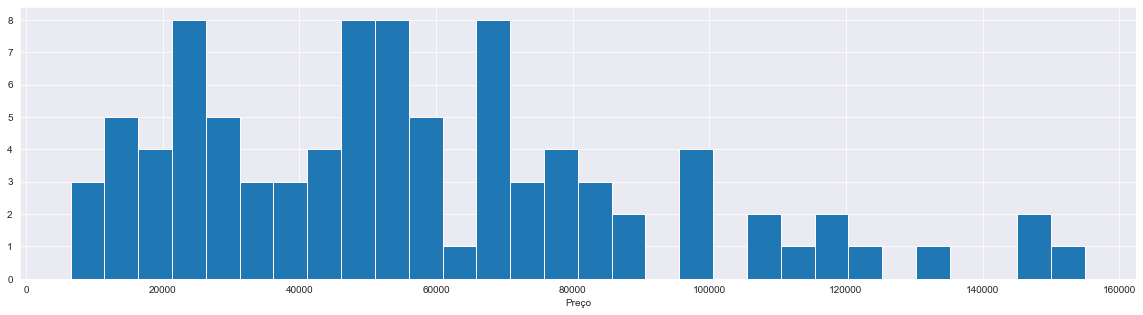

In [75]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
data_imo_trespasses['Preço'].hist(bins=30)
plt.xlabel('Preço')

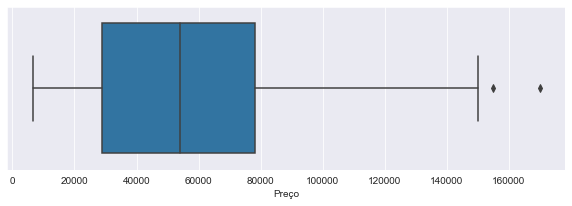

In [71]:
fig = plt.figure(figsize = (10,3))
sns.boxplot(x=data_imo_trespasses['Preço'])

In [73]:
a_excluir = data_imo_trespasses[(data_imo_trespasses['Preço'] >= 160000)]
data_imo_trespasses = data_imo_trespasses.drop(a_excluir.index)
data_imo_trespasses.index = np.arange(1, len(data_imo_trespasses) + 1)
a_excluir.shape

(1, 20)

*Área*

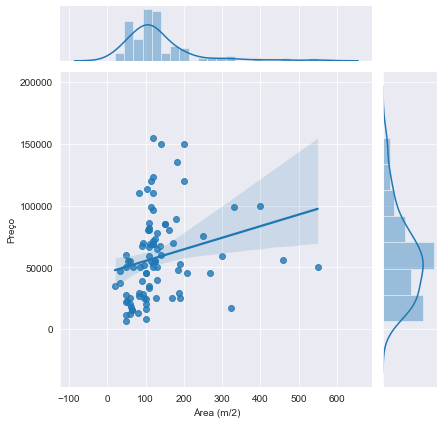

In [74]:
sns.jointplot(data_imo_trespasses['Área (m/2)'], data_imo_trespasses['Preço'], kind='reg')

In [76]:
a_excluir = data_imo_trespasses[(data_imo_trespasses['Área (m/2)'] >= 400)]
data_imo_trespasses = data_imo_trespasses.drop(a_excluir.index)
data_imo_trespasses.index = np.arange(1, len(data_imo_trespasses) + 1)
a_excluir.shape

(3, 20)

*Freguesia*

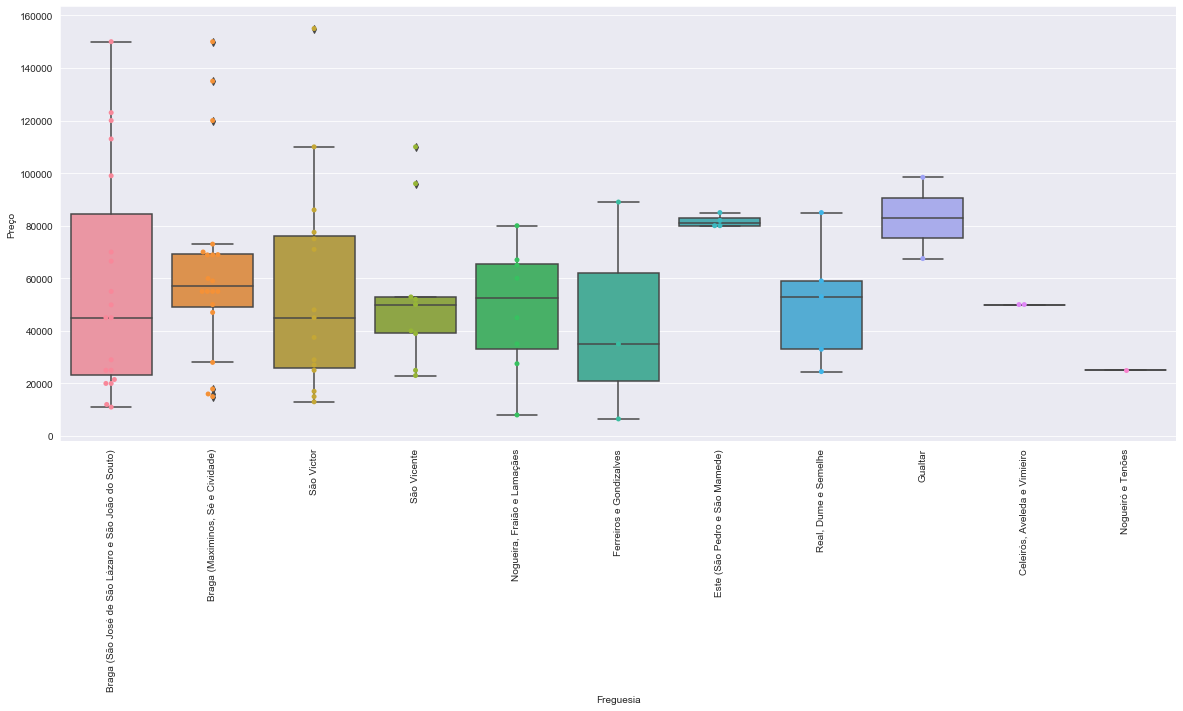

In [77]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.boxplot(data_imo_trespasses['Freguesia'], data_imo_trespasses['Preço'])
sns.swarmplot(data_imo_trespasses['Freguesia'], data_imo_trespasses['Preço'])
plt.show()

### Encoding Str -> Int

In [78]:
data_imo_trespasses_mlp = data_imo_trespasses.copy()
data_imo_trespasses = data_imo_trespasses.drop(columns=['Id'])

In [79]:
#freguesia = pd.get_dummies(data_imo_trespasses['Freguesia'])
#tipologia = pd.get_dummies(data_imo_trespasses['Tipologia'])
#condicao = pd.get_dummies(data_imo_trespasses['Condição'])

#data_imo_trespasses.drop(['Freguesia','Tipologia','Condição'],axis=1,inplace=True)
#data_imo_trespasses = pd.concat([data_imo_trespasses,freguesia,tipologia,condicao],axis=1)
#data_imo_trespasses

from sklearn.preprocessing import LabelEncoder
cat_features = data_imo_trespasses.dtypes[data_imo_trespasses.dtypes == "object"].index 
for c in cat_features.to_list():
    lbl = LabelEncoder() 
    lbl.fit(list(data_imo_trespasses[c].values)) 
    data_imo_trespasses[c] = lbl.transform(list(data_imo_trespasses[c].values))

### Outliers Z-Score

In [80]:
z = np.abs(stats.zscore(data_imo_trespasses))
threshold = 3
print(np.where(z > threshold))
# The first array contains the list of row numbers and second array respective column numbers

(array([ 0,  1,  6, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 53, 53,
       53, 55, 55, 55, 55, 55, 55, 55, 55, 72, 72, 72, 84, 84, 84],
      dtype=int64), array([ 2,  3,  3,  7,  8,  9, 13,  4,  7,  8,  9, 12, 13, 14, 17, 10, 15,
       18,  4,  7,  8,  9, 12, 13, 14, 17, 10, 15, 18, 10, 15, 18],
      dtype=int64))


In [81]:
# Só fazer 1 vez
data_imo_trespasses = data_imo_trespasses[(np.abs(stats.zscore(data_imo_trespasses)) < 3).all(axis=1)]
data_imo_trespasses.index = np.arange(1, len(data_imo_trespasses) + 1)
data_imo_trespasses

#data_imo_trespasses = data_imo_trespasses[(np.abs(stats.zscore(data_imo_trespasses['Preço'])) < 1)]
#data_imo_trespasses.index = np.arange(1, len(data_imo_trespasses) + 1)
#data_imo_trespasses

,Preço,Freguesia,Condição,Área (m/2),Centro Cidade (km),Hospitais (km),Centros Saúde (km),Centro Comerciais (km),Escolas (km),Universidades (km),Estação de Comboios (km),Parques Industriais (km),Central Autocarros (km),Bancos (km),Correios (km),Parques e Zonas Verdes (km),Serviços Públicos (km),Policia Municipal (km),Farmácias (km)
1,15990,0,2,100.0,0.523,0.361,0.106,2.061,0.762,0.772,0.645,2.169,0.863,0.255,0.522,0.240,0.398,0.209,0.336
2,73000,0,2,124.0,0.743,0.473,0.070,2.234,0.604,0.645,0.660,2.280,1.097,0.483,0.567,0.069,0.497,0.442,0.472
3,15000,10,2,65.0,1.586,1.314,0.547,0.299,0.601,0.932,2.603,3.503,1.726,0.806,0.179,0.301,0.629,1.950,0.415
4,110000,9,2,83.0,0.809,1.007,0.191,1.329,0.170,0.430,1.564,2.097,0.468,0.704,0.458,0.792,0.294,1.092,0.289
5,45000,6,2,100.0,2.886,0.314,1.712,1.827,2.014,1.867,3.030,3.973,3.362,2.179,1.316,1.513,2.327,2.813,0.418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,50000,2,2,120.0,5.495,4.248,0.587,6.084,3.835,4.815,4.672,0.631,5.743,3.709,4.335,1.782,2.370,5.140,0.977
76,120000,0,2,200.0,0.741,0.882,0.519,2.277,0.872,1.003,0.399,1.587,0.711,0.342,0.665,0.778,0.808,0.465,0.251
77,50000,0,2,67.0,1.052,0.969,0.227,2.633,0.790,1.187,0.168,1.813,1.196,0.058,0.250,0.636,0.335,0.675,0.122
78,25000,1,2,60.0,0.190,0.397,0.183,1.772,0.647,0.581,0.830,2.103,0.520,0.009,0.160,0.311,0.271,0.193,0.119


**Análise exploratória dos dados sem outliers**

----

## Skewness

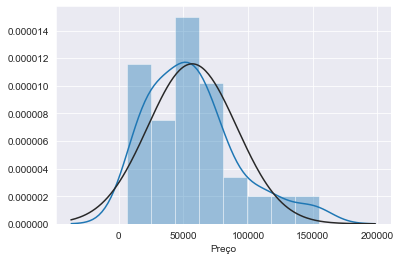

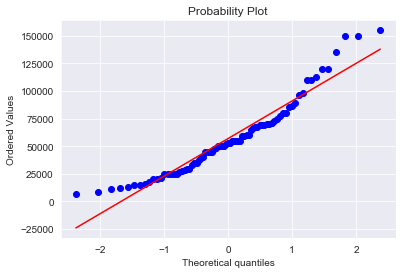

In [82]:
sns.distplot(data_imo_trespasses['Preço'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(data_imo_trespasses['Preço'], plot=plt)

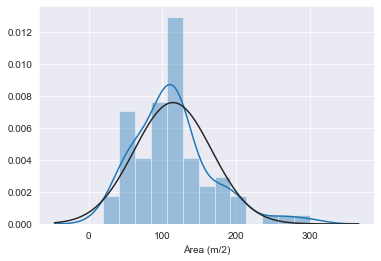

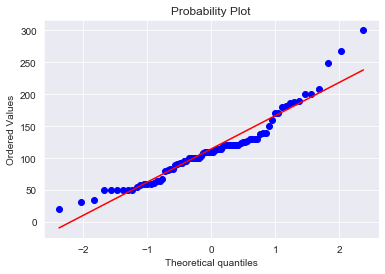

In [84]:
sns.distplot(data_imo_trespasses['Área (m/2)'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(data_imo_trespasses['Área (m/2)'], plot=plt)

## Dataset estruturado

In [85]:
data_imo_trespasses

,Preço,Freguesia,Condição,Área (m/2),Centro Cidade (km),Hospitais (km),Centros Saúde (km),Centro Comerciais (km),Escolas (km),Universidades (km),Estação de Comboios (km),Parques Industriais (km),Central Autocarros (km),Bancos (km),Correios (km),Parques e Zonas Verdes (km),Serviços Públicos (km),Policia Municipal (km),Farmácias (km)
1,15990,0,2,100.0,0.523,0.361,0.106,2.061,0.762,0.772,0.645,2.169,0.863,0.255,0.522,0.240,0.398,0.209,0.336
2,73000,0,2,124.0,0.743,0.473,0.070,2.234,0.604,0.645,0.660,2.280,1.097,0.483,0.567,0.069,0.497,0.442,0.472
3,15000,10,2,65.0,1.586,1.314,0.547,0.299,0.601,0.932,2.603,3.503,1.726,0.806,0.179,0.301,0.629,1.950,0.415
4,110000,9,2,83.0,0.809,1.007,0.191,1.329,0.170,0.430,1.564,2.097,0.468,0.704,0.458,0.792,0.294,1.092,0.289
5,45000,6,2,100.0,2.886,0.314,1.712,1.827,2.014,1.867,3.030,3.973,3.362,2.179,1.316,1.513,2.327,2.813,0.418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,50000,2,2,120.0,5.495,4.248,0.587,6.084,3.835,4.815,4.672,0.631,5.743,3.709,4.335,1.782,2.370,5.140,0.977
76,120000,0,2,200.0,0.741,0.882,0.519,2.277,0.872,1.003,0.399,1.587,0.711,0.342,0.665,0.778,0.808,0.465,0.251
77,50000,0,2,67.0,1.052,0.969,0.227,2.633,0.790,1.187,0.168,1.813,1.196,0.058,0.250,0.636,0.335,0.675,0.122
78,25000,1,2,60.0,0.190,0.397,0.183,1.772,0.647,0.581,0.830,2.103,0.520,0.009,0.160,0.311,0.271,0.193,0.119


## Modelos de regressão


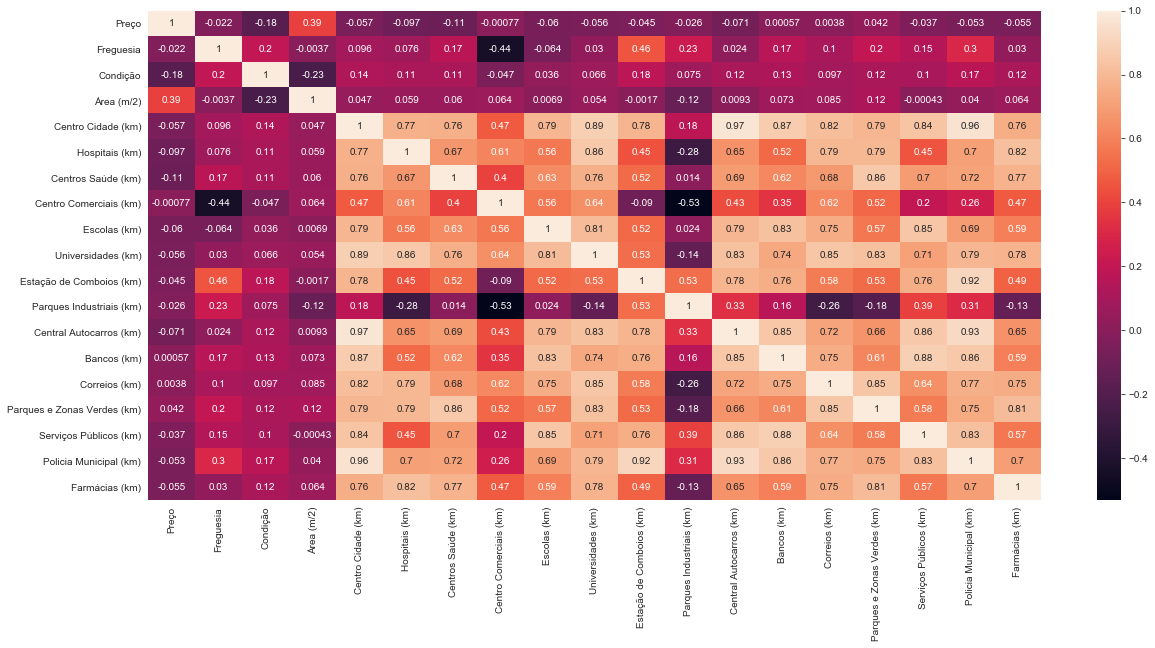

In [86]:
corr = data_imo_trespasses.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

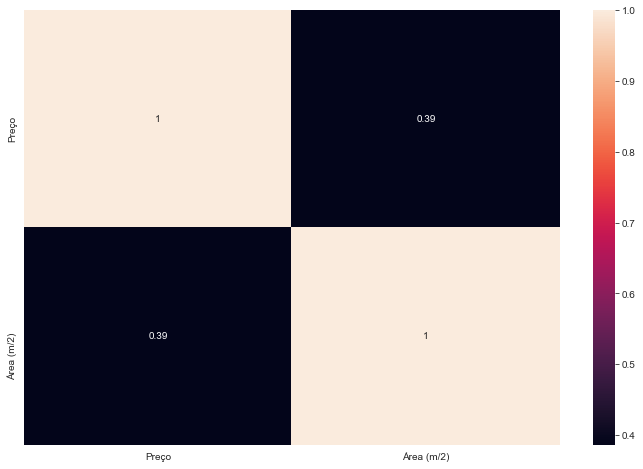

In [87]:
top_feature = corr.index[abs(corr['Preço']>0.1)]
plt.subplots(figsize=(12, 8))
top_corr = data_imo_trespasses[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

**Features mais importantes relativamente ao target**

In [88]:
corr = data_imo_trespasses.corr()
corr.sort_values(['Preço'], ascending=False, inplace=True)
corr.Preço

Preço                          1.000000
Área (m/2)                     0.386060
Parques e Zonas Verdes (km)    0.041571
Correios (km)                  0.003825
Bancos (km)                    0.000570
                                 ...   
Escolas (km)                  -0.059732
Central Autocarros (km)       -0.070678
Hospitais (km)                -0.096510
Centros Saúde (km)            -0.110718
Condição                      -0.179452
Name: Preço, Length: 19, dtype: float64

## Train Test Split

In [89]:
y = data_imo_trespasses['Preço']

In [90]:
X = data_imo_trespasses.drop('Preço',axis=1)

In [91]:
X = X.values
y = y.values

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train.shape

(63, 18)

### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

**Funções auxiliares**

In [97]:
def printMetrics(y_test, predictions):
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    
def drawPlots(y_test, predictions, model):
    plt.plot(predictions, color= 'red')
    plt.plot(y_test, color= 'green')
    plt.title("Valores dos preços previstos e reais")
    plt.xlabel("Row")
    plt.ylabel("Preço")
    plt.legend(['previsto', 'real'], loc='upper right')
    plt.show()

    plt.plot(y_test, color= 'green')
    plt.plot(predictions, color= 'red')
    plt.title("Valores dos preços previstos e reais")
    plt.xlabel("Row")
    plt.ylabel("Preço")
    plt.legend(['real', 'previsto'], loc='upper right')
    plt.show()

    plt.scatter(predictions, y_test, alpha=.25,color='b') #alpha helps to show overlapping data
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title(model)
    plt.show()
    
    sns.jointplot(predictions, y_test, kind='reg')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.show()

### Linear Regression

In [98]:
from sklearn import linear_model

# Compile the model
model = linear_model.LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Metrics
printMetrics(y_test, predictions)

MAE: 28835.100320488633
MSE: 1341383785.0616963
RMSE: 36624.906621883645


In [99]:
print("Predict value " + str(predictions[10]))
print("Real value " + str(y_test[10]))

Predict value 43092.602679758376
Real value 35000


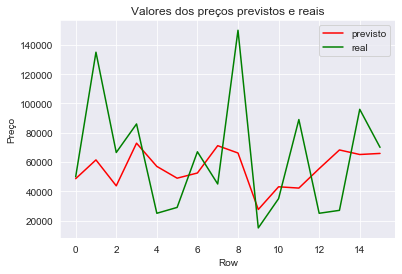

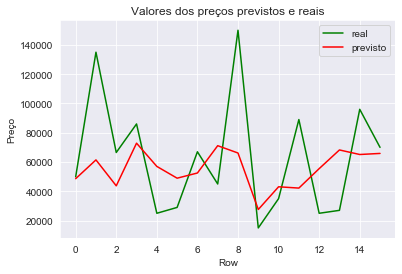

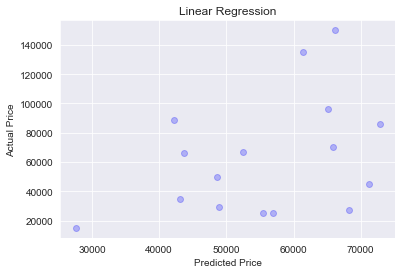

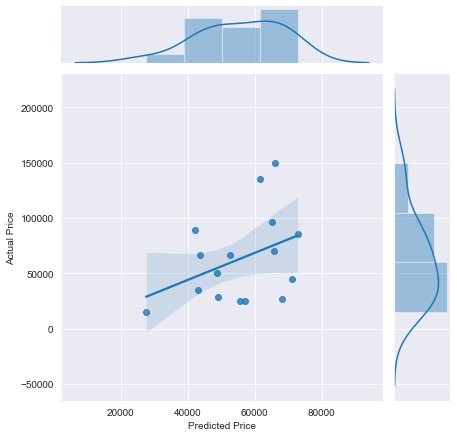

In [100]:
drawPlots(y_test, predictions, 'Linear Regression')

### RandomForestRegression

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Compile the model
rf = RandomForestRegressor(random_state = 42)


#Hyperparamater tuning using RanodomSearchCV
param_grid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 600, stop = 1300, num = 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [12,14,16],
    'min_samples_split' : [2, 4, 6],
    'min_samples_leaf' : [1, 2]
}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


# Fit the model
#rf.fit(X_train,y_train)

# Predict
#predictions = rf.predict(X_test)
predictions = grid_search.predict(X_test)

# Metrics
printMetrics(y_test, predictions)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 17.4min finished


{'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}
0.24754081074357304
MAE: 22857.976562499996
MSE: 1129715652.886657
RMSE: 33611.24295361088


In [102]:
print("Predict value " + str(predictions[10]))
print("Real value " + str(y_test[10]))

Predict value 50745.816666666666
Real value 35000


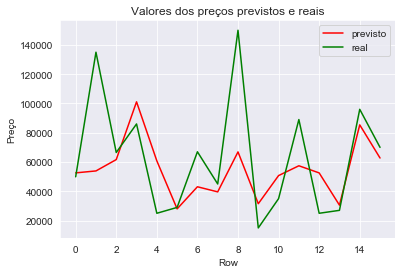

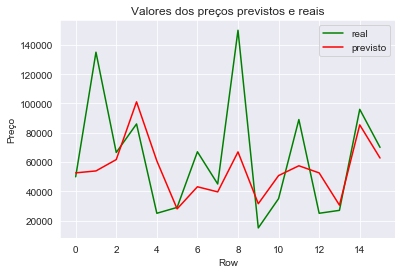

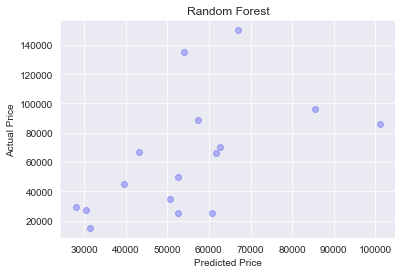

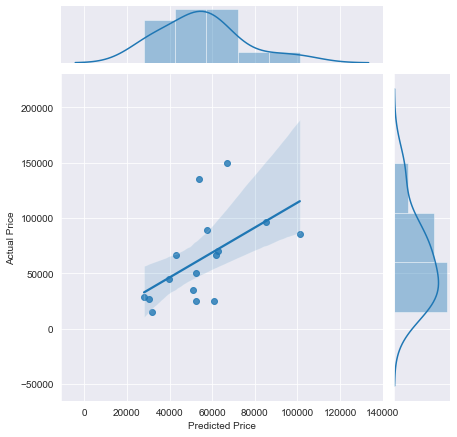

In [103]:
drawPlots(y_test, predictions, 'Random Forest')

### Standard Machine Learning Models (TEMPORÁRIO)

In [104]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [105]:
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [106]:
results = evaluate(X_train, X_test, y_train, y_test)

In [107]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

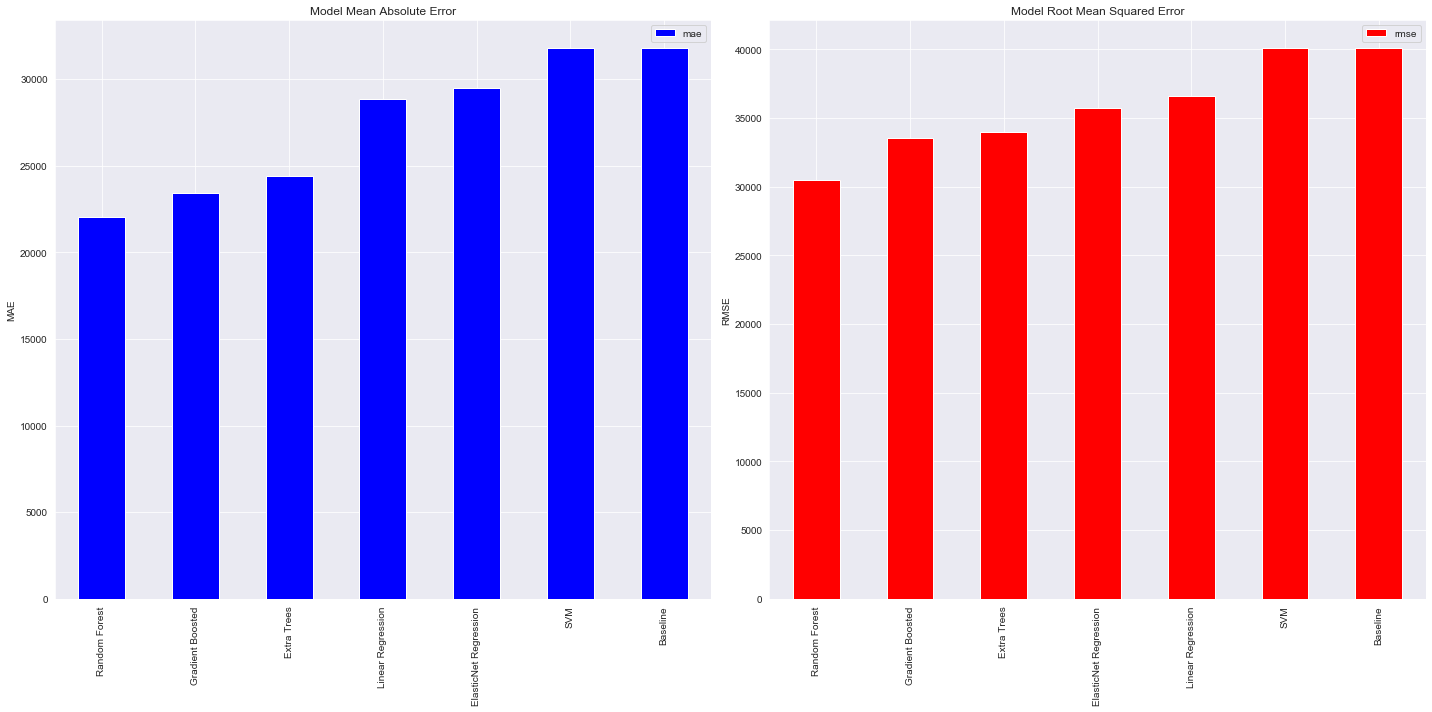

In [108]:
fig = plt.figure(figsize = (20,10))
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

### Ridge Regression

**GridSearchCV**

In [109]:
from sklearn.linear_model import Ridge

# Parameters
params_ridge ={
        'alpha':[0.5,0.75,1,1.25,1.5],
        'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
        'max_iter':[500,750,1000,1250,1500]
        }

# Compile the model
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, param_grid = params_ridge, cv = 5, n_jobs = -1, verbose = 2)

# Fit the model
ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)

# Predict
predictions = ridge_grid.predict(X_test)

# Metrics
printMetrics(y_test, predictions)

Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


{'alpha': 0.75, 'max_iter': 500, 'solver': 'saga'}
-0.07761015934211304
MAE: 29236.89721276376
MSE: 1253093688.6196914
RMSE: 35399.06338619274


[Parallel(n_jobs=-1)]: Done 779 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 875 out of 875 | elapsed:    1.2s finished
C:\Users\Rui\Anaconda3\envs\LEI\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [110]:
print("Predict value " + str(predictions[10]))
print("Real value " + str(y_test[10]))

Predict value 52186.15337968655
Real value 35000


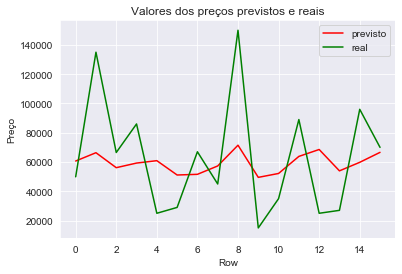

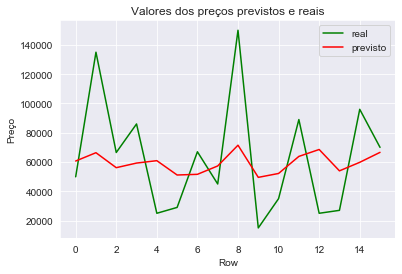

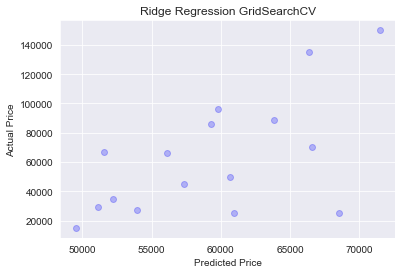

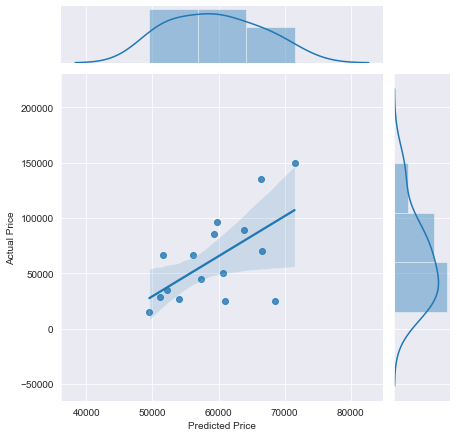

In [111]:
drawPlots(y_test, predictions, 'Ridge Regression GridSearchCV')

### GradientBoostingRegressor

**GridSearchCV**

In [112]:
from sklearn.ensemble import GradientBoostingRegressor

# Parameters
params_gbr={
    'loss':['ls', 'lad', 'huber', 'quantile'],
    'n_estimators':[15,25,50,100],
    'min_samples_split':[1,2,3],
    'max_depth':[4,6,8,10],
    'max_features':['auto', 'sqrt', 'log2']
}

# Compile the model
gbr = GradientBoostingRegressor()
gbr_grid = GridSearchCV(estimator=gbr, param_grid=params_gbr, cv=5, n_jobs=-1, verbose=2)

# Fit the model
gbr_grid.fit(X_train, y_train)
print(gbr_grid.best_params_)
print(gbr_grid.best_score_)

# Predict
predictions = gbr_grid.predict(X_test)

# Metrics
printMetrics(y_test, predictions)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1163 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1538 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  1.2min finished


{'loss': 'huber', 'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 25}
0.29508892768432
MAE: 24173.729577155776
MSE: 1137425692.5864089
RMSE: 33725.74228369791


In [113]:
print("Predict value " + str(predictions[10]))
print("Real value " + str(y_test[10]))

Predict value 64937.65155645928
Real value 35000


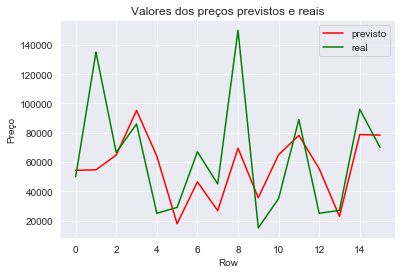

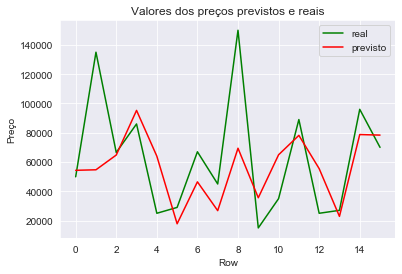

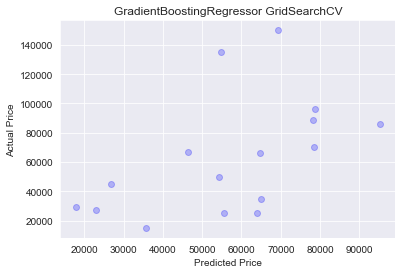

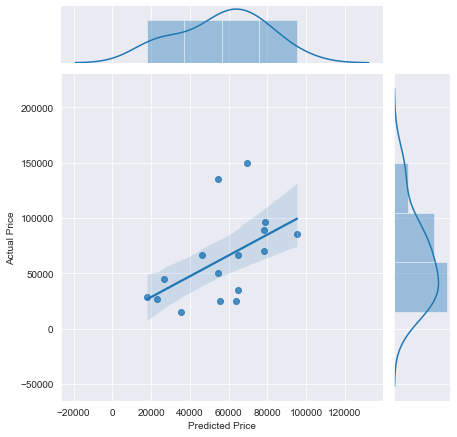

In [114]:
drawPlots(y_test, predictions, 'GradientBoostingRegressor GridSearchCV')

### Decision Tree Regression with AdaBoost

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

rng = np.random.RandomState(1)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Metrics
printMetrics(y_2, y)

MAE: 10900.587013540837
MSE: 204506398.61798176
RMSE: 14300.573366756375


In [116]:
print("Predict value " + str(y_1[10]))
print("Real value " + str(y[10]))

Predict value 53000.0
Real value 52000


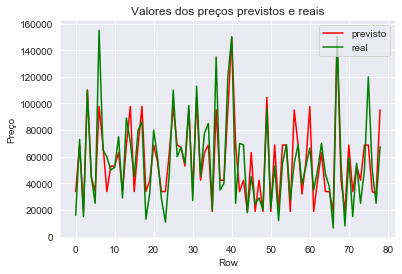

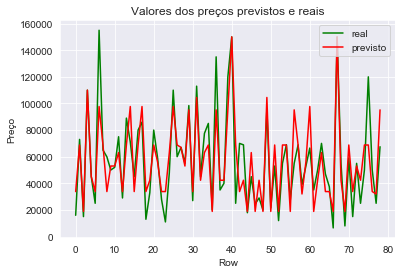

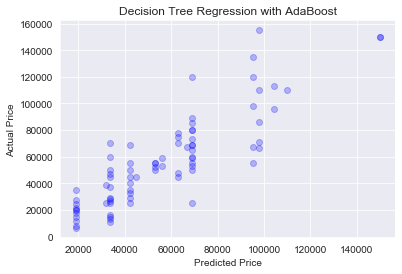

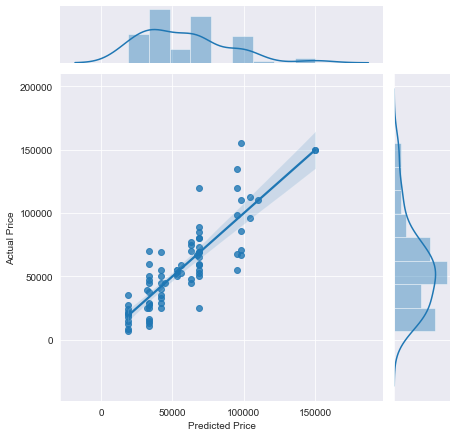

In [117]:
drawPlots(y, y_1, 'Decision Tree Regression with AdaBoost')

### LGBM & ANN - Data Preparation

In [118]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [119]:
data_imo_trespasses_mlp

,Id,Preço,Freguesia,Condição,Área (m/2),Centro Cidade (km),Hospitais (km),Centros Saúde (km),Centro Comerciais (km),Escolas (km),Universidades (km),Estação de Comboios (km),Parques Industriais (km),Central Autocarros (km),Bancos (km),Correios (km),Parques e Zonas Verdes (km),Serviços Públicos (km),Policia Municipal (km),Farmácias (km)
1,12358735,123000,Braga (São José de São Lázaro e São João do So...,Novo,120.0,0.190,0.397,0.183,1.772,0.647,0.581,0.830,2.103,0.520,0.009,0.160,0.311,0.271,0.193,0.119
2,15340571,99000,Braga (São José de São Lázaro e São João do So...,Usado,332.0,0.040,0.423,0.376,1.577,0.563,0.393,1.021,2.192,0.439,0.021,0.068,0.141,0.078,0.391,0.102
3,15089074,15990,"Braga (Maximinos, Sé e Cividade)",Usado,100.0,0.523,0.361,0.106,2.061,0.762,0.772,0.645,2.169,0.863,0.255,0.522,0.240,0.398,0.209,0.336
4,15255657,73000,"Braga (Maximinos, Sé e Cividade)",Usado,124.0,0.743,0.473,0.070,2.234,0.604,0.645,0.660,2.280,1.097,0.483,0.567,0.069,0.497,0.442,0.472
5,15319709,15000,São Victor,Usado,65.0,1.586,1.314,0.547,0.299,0.601,0.932,2.603,3.503,1.726,0.806,0.179,0.301,0.629,1.950,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,11165494,120000,"Braga (Maximinos, Sé e Cividade)",Usado,200.0,0.741,0.882,0.519,2.277,0.872,1.003,0.399,1.587,0.711,0.342,0.665,0.778,0.808,0.465,0.251
85,14991608,80000,Este (São Pedro e São Mamede),Usado,110.0,5.890,3.516,2.528,4.320,2.610,3.439,6.910,5.614,5.942,2.625,4.326,4.305,2.516,6.260,2.580
86,15222039,50000,"Braga (Maximinos, Sé e Cividade)",Usado,67.0,1.052,0.969,0.227,2.633,0.790,1.187,0.168,1.813,1.196,0.058,0.250,0.636,0.335,0.675,0.122
87,14667279,25000,Braga (São José de São Lázaro e São João do So...,Usado,60.0,0.190,0.397,0.183,1.772,0.647,0.581,0.830,2.103,0.520,0.009,0.160,0.311,0.271,0.193,0.119


In [120]:
data_imo_trespasses_mlp = pd.get_dummies(data_imo_trespasses_mlp)

In [121]:
data_imo_trespasses_mlp.shape

(88, 32)

In [122]:
y_mlp = data_imo_trespasses_mlp['Preço']
X_mlp = data_imo_trespasses_mlp.drop('Preço',axis=1)

from sklearn.model_selection import train_test_split
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X, y, test_size=0.2, random_state=7)
X_train_mlp.shape

(63, 18)

In [123]:
y_train_mlp = pd.DataFrame({'Preço':y_train}) 

In [124]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_X = StandardScaler()
y_train_mlp = sc_y.fit_transform(y_train_mlp)
X_train_mlp = sc_X.fit_transform(X_train_mlp)
X_test_mlp = sc_X.transform(X_test_mlp)

In [125]:
y_train_mlp.shape

(63, 1)

In [126]:
flat_y_mlp = y_train_mlp.flatten()
flat_y_mlp.shape

(63,)

### LGBM

In [127]:
import lightgbm as lgb

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train_mlp, flat_y_mlp)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')

# train
gbm = lgb.train(params, lgb_train, num_boost_round=250)

# predict
lgbm_prediction_tr = gbm.predict(X_train_mlp, num_iteration=gbm.best_iteration)
lgbm_prediction_te = gbm.predict(X_test_mlp, num_iteration=gbm.best_iteration)

Starting training...


In [128]:
train = lgbm_prediction_tr
test = lgbm_prediction_te

In [129]:
y_pred_mlp = sc_y.inverse_transform(lgbm_prediction_te)

In [130]:
y_pred_mlp

array([65016.12404524, 68927.42881697, 71778.1981942 , 83556.01122929,
       61467.37115171, 39591.66408883, 27305.47530892, 45948.60820336,
       73462.35457321, 16520.77149258, 60485.65751944, 60800.07634254,
       65016.12404524, 45948.60820336, 92573.15666435, 68272.86520973])

In [131]:
# Metrics
printMetrics(y_test, y_pred_mlp)

MAE: 23279.734924934815
MSE: 1057916657.1382061
RMSE: 32525.630772334087


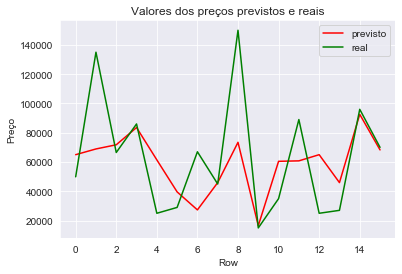

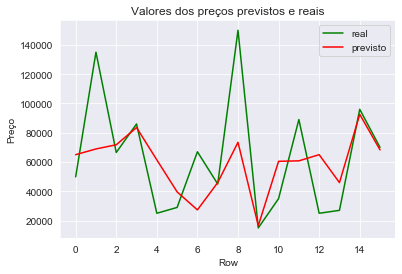

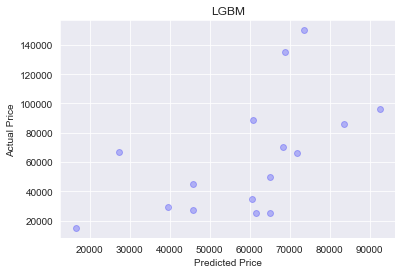

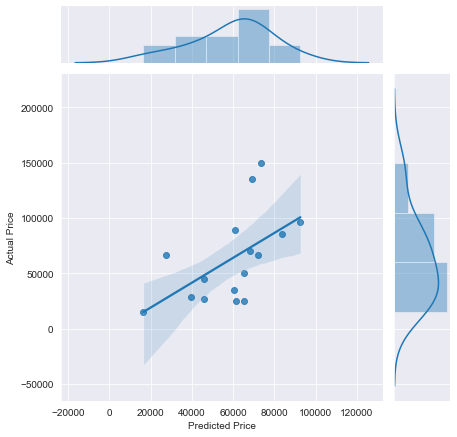

In [132]:
drawPlots(y_test, y_pred_mlp, 'LGBM')

### ANN

In [133]:
def print_history_mae(history):
    print(history.history.keys())
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('model mae')
    plt.ylabel('mae')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def print_history_loss(history):
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [135]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(18, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [136]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                608       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)               

In [137]:
model_filepath = 'min_vl_model.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_mae', verbose=1, save_best_only = True, mode='min')

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=3000, callbacks=[checkpoint])

model.load_weights(model_filepath)

Train on 50 samples, validate on 13 samples
Epoch 1/3000
50/50 [==============================] - 1s 15ms/step - loss: 52051.7830 - mae: 52051.7812 - val_loss: 67676.1797 - val_mae: 67676.1797

Epoch 00001: val_mae improved from inf to 67676.17969, saving model to min_vl_model.h5
Epoch 2/3000
50/50 [==============================] - 0s 160us/step - loss: 52051.7031 - mae: 52051.6992 - val_loss: 67676.1094 - val_mae: 67676.1094

Epoch 00002: val_mae improved from 67676.17969 to 67676.10938, saving model to min_vl_model.h5
Epoch 3/3000
50/50 [==============================] - 0s 160us/step - loss: 52051.6406 - mae: 52051.6406 - val_loss: 67676.0469 - val_mae: 67676.0469

Epoch 00003: val_mae improved from 67676.10938 to 67676.04688, saving model to min_vl_model.h5
Epoch 4/3000
50/50 [==============================] - 0s 140us/step - loss: 52051.5825 - mae: 52051.5781 - val_loss: 67675.9844 - val_mae: 67675.9844

Epoch 00004: val_mae improved from 67676.04688 to 67675.98438, saving model 

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


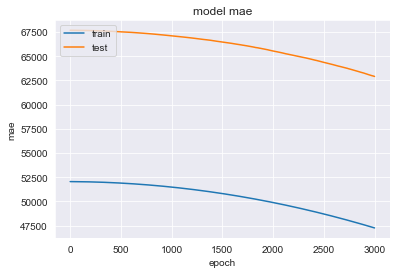

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


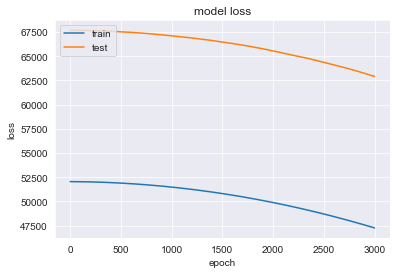

In [138]:
print_history_mae(history)
print_history_loss(history)

In [139]:
y_pred_mlp = model.predict(X_test_scaled)

In [140]:
y_pred_mlp

array([[4770.884 ],
       [4821.099 ],
       [4760.7373],
       [4757.574 ],
       [4767.9556],
       [4762.633 ],
       [4786.362 ],
       [4757.949 ],
       [4783.1484],
       [4769.615 ],
       [4779.1533],
       [4753.28  ],
       [4769.256 ],
       [4758.586 ],
       [4760.3633],
       [4755.8486]], dtype=float32)

In [141]:
y_preds = []

for item in y_pred_mlp:
    y_preds.append(item[0])

In [142]:
# Metrics
printMetrics(y_test, y_preds)

MAE: 58380.347229003906
MSE: 4910677186.351109
RMSE: 70076.22411596609


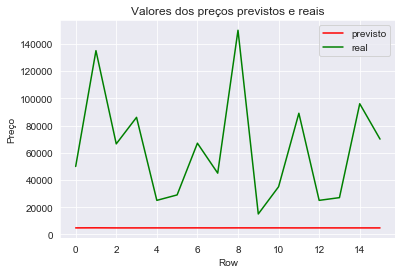

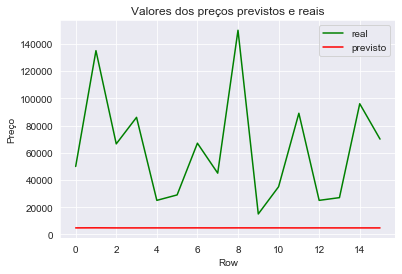

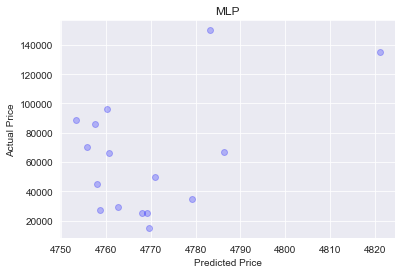

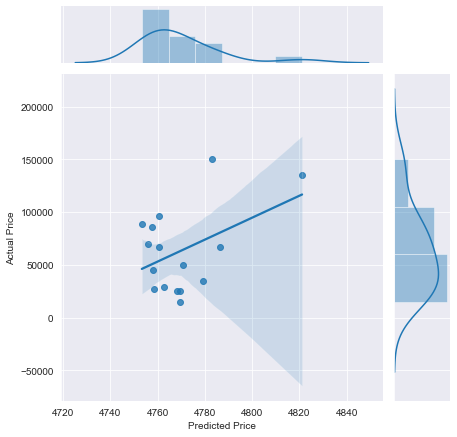

In [143]:
drawPlots(y_test, y_preds, 'MLP')